<a href="https://colab.research.google.com/github/Golden-Adreet/ODE_Solving_Methodes/blob/master/RK4_2nd_order_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def dshm(x,y,t,k,lam):
  dxdt = y
  dydt = -(k*x + lam*y)/m
  return np.array([dxdt, dydt])

<ipython-input-18-507e4e6dd7da>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


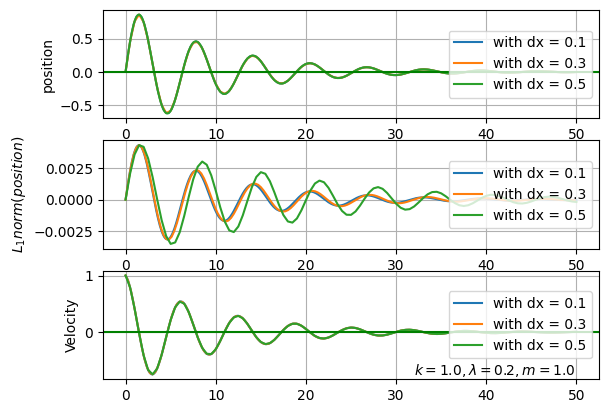

In [18]:
k, lam, m = 1.0, 0.2, 1.0
H = [0.1,0.3,0.5]
ti = 0
t = ti
xi =0
yi = 1
tf = 50.0
for h in H:
  a = f'RK4_ODE2_with_dt_{h}.dat'
  fp = open(a,'w')
  t = ti
  x = xi;y=yi
  s = int((tf-ti)/h)
  fp.write(f'{t},{x},{y}\n')
  for _ in range(s):
    a = dshm(x,y,t,k,lam)
    a1 = h*a[0]
    a2 = h*a[1]

    b = dshm(x+0.5*a1,y+0.5*a2,t+0.5*h,k,lam)
    b1 = h*b[0]
    b2 = h*b[1]

    c = dshm(x+0.5*b1,y+0.5*b2,t+0.5*h,k,lam)
    c1 = h*c[0]
    c2 = h*c[1]

    d = dshm(x+c1,y+c2,t+h,k,lam)
    d1 = h*d[0]
    d2 = h*d[1]

    x += (a1 + 2*b1 + 2*c1 + d1)/6.0
    y += (a2 + 2*b2 + 2*c2 + d2)/6.0
    t += h
    fp.write(f'{t},{x},{y}\n')
  fp.close()
a = np.loadtxt(f'RK4_ODE2_with_dt_0.1.dat',delimiter = ',')
a1,b1,c1 = a[:,0],a[:,1],a[:,2]

a = np.loadtxt(f'RK4_ODE2_with_dt_0.3.dat',delimiter = ',')
a2,b2,c2 = a[:,0],a[:,1],a[:,2]
a = np.loadtxt(f'RK4_ODE2_with_dt_0.5.dat',delimiter = ',')
a3,b3,c3 = a[:,0],a[:,1],a[:,2]
dis = k/m - lam**2/(4.0*m**2)
w = np.sqrt(dis)
plt.figure(2)
plt.title('Weakly Damped Harmonic Motion (RK4)')
leg = ['with dx = 0.1','with dx = 0.3','with dx = 0.5']
plt.subplot(3,1,1)
plt.plot(a2,b2,a3,b3,a1,b1)
plt.legend(leg,loc='right')
plt.axhline().set_color('green')
plt.xticks()
plt.grid()
plt.ylabel('position')
plt.subplot(3,1,2)
phi = np.pi/2
def f(x):
  global phi,lam,m,w
  return np.exp(-lam*x/(2.0*m))*np.cos(w*x-phi)
plt.plot(a1,b1-f(a1),a2,b2-f(a2),a3,b3-f(a3))
plt.legend(leg,loc='right')
plt.xticks()
plt.grid()
plt.ylabel(r'$L_1 norm(position)$')
plt.subplot(3,1,3)
plt.plot(a1,c1,a2,c2,a3,c3)
plt.legend(leg,loc='right')
plt.axhline().set_color('green')
plt.xticks()
plt.ylabel('Velocity')
plt.grid()
plt.text(32,-0.75,r'$k='+str(k)+', \lambda=' + str(lam)+', m=' + str(m)+'$')
plt.show()